# Patching and Data Augmentation for Histology Images
---
Juan Pablo García Martínez  
Master in Bioestatisticts and Bioinformatics UOC-UB  
16-Dec-2018
***

# Index:
> 1. Loading Data And Packages
> 2. Patching and Data Augmentation
> 3. Image Samples
> 4. How to Work With Batches (Example)
> 5. Saving the Database

## 1. Loading Data and Packages

For this example we are using two different folder with two different image file type as PNG and JPG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import os

For positive images we are using jpg images

In [2]:
im = Image.open("../dataset_A/original/positive_images/20171005091805.jpg")
imgwidth, imgheight = im.size
imgwidth, imgheight, im.size

(1532, 834, (1532, 834))

For negative images we are using png images

In [3]:
im1 = Image.open("../dataset_A/original/negative_images/BM_GRAZ_HE_0020_01.png")
imgwidth1, imgheight1 = im1.size
imgwidth1, imgheight1, im1.size

(1200, 1200, (1200, 1200))

we can ajust the size the images as much as posssible by using the formula below, the goal is to approach the size of the patches as much as possible to 200x200 px

In [4]:
n_patch_div_2 = 5
height = np.int_(np.round_(((imgwidth * imgheight)**0.5)/n_patch_div_2, 0))
width = np.int_(np.round_(((imgwidth * imgheight)**0.5)/n_patch_div_2, 0))
path = "../Images/"
print(height, width)

226 226


In [5]:
height1 = np.int_(np.round_(((imgwidth1 * imgheight1)**0.5)/n_patch_div_2, 0))
width1 = np.int_(np.round_(((imgwidth1 * imgheight1)**0.5)/n_patch_div_2, 0))
print(height1, width1)

240 240


## 2. Patching and Data Augmentation

Process in the code:
 1. Defining start point a final for the patching. Using the iteration "i" for height and "j" for width.
 2. Defining the image as PAL type applying the 'RGB' format.
 3. Setting up the box variable that we will use later on in the function crop for the patching.
 4. As we need to consolodite our database we will resize all the images to 200x200 plx
 5. Filtering:  
    * Applying a grey scale and contract increase we will discard all images fully black or white.
    * Applying a filter by variance of the matrix we will discard no meaningful images.

In [50]:
Train_Data = []
y_data =[]
data_dir = "../dataset_A/original/positive_images/"
files = glob(os.path.join(data_dir, '*.jpg'))

# Positive
for myFile in files:
    im = Image.open(myFile)
    for i in range(0,imgheight-height,height):
        for j in range (0, imgwidth-width, width):
            a = im.convert('RGB')
            j1 =  min(0, imgwidth - j+width)
            i1 =  min(0, imgheight - j+height)
            box = (j, i, j+width, i+height)
            # Crop images 226x226 px
            a = a.crop(box)
            # Resize to 200x200 px
            a = a.resize((200, 200), Image.ANTIALIAS)
            # filter images by applying requirement. Variance of the matrix has been calculated manually
            if a.convert("L").getextrema() not in ((0,0), (255,255)) and np.var(a) > 1200 and np.var(a) < 14200:
                Train_Data.append (np.array(a))
                y_data.append (1)
                #Transpose images for data augmentation
                b = a.transpose(Image.FLIP_LEFT_RIGHT)
                b = b.transpose(Image.FLIP_TOP_BOTTOM)
                Train_Data.append (np.array(b))
                y_data.append (1)
print(len(y_data))
# Negative
data_dir = "../dataset_A/original/negative_images/"
files = glob(os.path.join(data_dir, '*.png'))
files
for myFile in files:
    im = Image.open(myFile)
    for i in range(0,imgheight1-height1,height1):
        for j in range (0, imgwidth1-width1, width1):
            a = im.convert('RGB')
            j1 =  min(0, imgwidth1 - j+width1)
            i1 =  min(0, imgheight1 - j+height1)
            box = (j, i, j+width1, i+height1)
            a = a.crop(box)
            a = a.resize((200, 200), Image.ANTIALIAS)
            if a.convert("L").getextrema() not in ((0,0), (255,255)) and np.var(a) > 1200 and np.var(a) < 14200:
                Train_Data.append (np.array(a))
                y_data.append (0)
                b = a.transpose(Image.FLIP_LEFT_RIGHT)
                b = b.transpose(Image.FLIP_TOP_BOTTOM)
                Train_Data.append (np.array(b))
                y_data.append (0)
print(len(y_data))

984
1328


In [10]:
len(Train_Data), len(Train_Data)==len(y_data)

(1328, True)

In [11]:
# Data normalisation
#Train_Data = (np.array(Train_Data, dtype = np.float32)/255).reshape(-1,200,200,3)

## 3. Image Samples

In [52]:
data_positive = Train_Data[0:984]
data_negative = Train_Data[985:1328]

Positive Images Visualisation

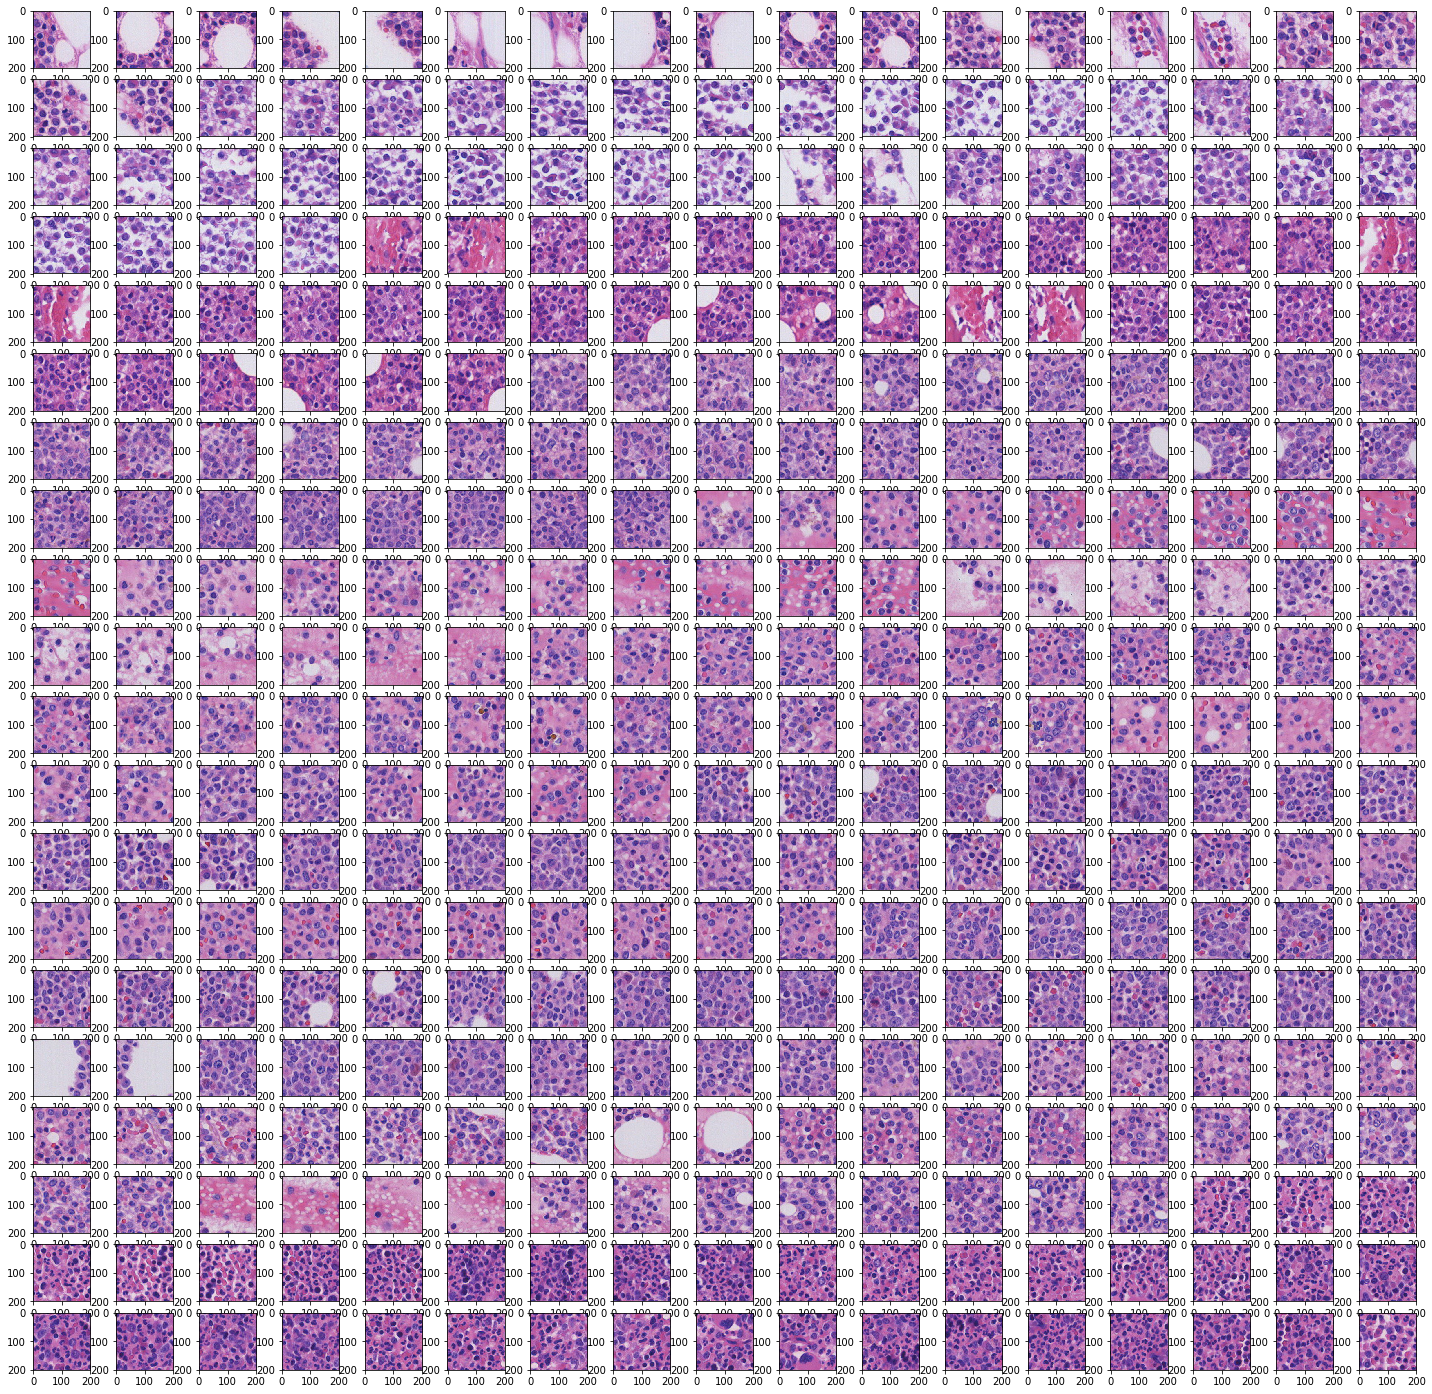

In [53]:
fig=plt.figure(figsize=(25, 25))
columns = 17
rows = 20
for i in range(1, columns*rows +1):
    img = data_positive[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Negative Images Visualisation

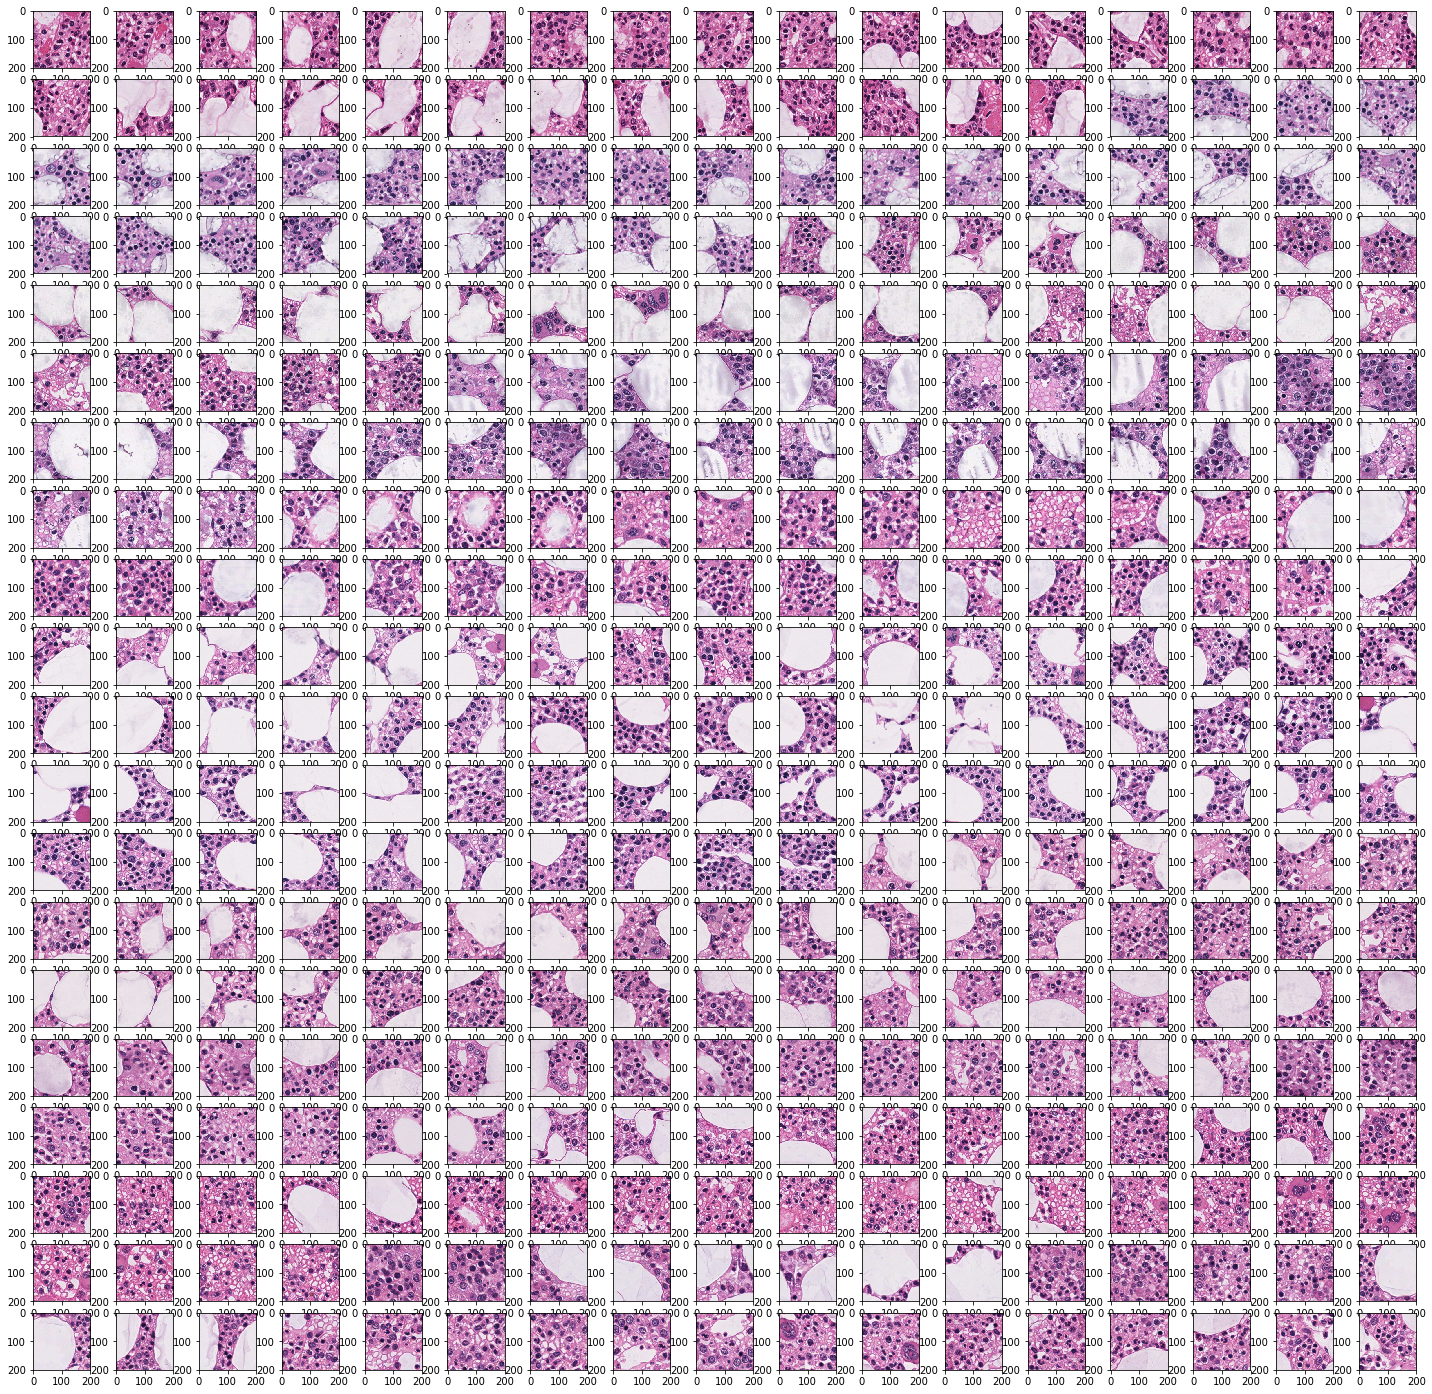

In [54]:
fig=plt.figure(figsize=(25, 25))
columns = 17
rows = 20
for i in range(1, columns*rows +1):
    img = data_negative[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## 4. How to Work With Batches (Example)

This just a first try about how to work with images by batches as it is fundamental for working with tensorflow.

In [141]:
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200
shape = len(Train_Data), IMAGE_WIDTH, IMAGE_HEIGHT, 3

In [142]:
shape, len(Train_Data.shape)

((1328, 200, 200, 3), 4)

In [ ]:
data = []
batch_size = 36
shape

In [145]:
def batch_data(data, batch_size, shape):
    current_index = batch_size
    #data = []
    for i in range (current_index, shape[0], batch_size):
        data_batch = data[i-batch_size:i] , *shape[1:3]
        #data.append(data_batch)
        yield (data_batch)

In [146]:
batch_data(Train_Data, 36, shape)

<generator object batch_data at 0x7f3d481c22b0>

## 5. Saving the Database

Saving database in an external file to export it to a different notebook by using the package *pickle*.

In [150]:
import pickle

In [152]:
pickle_out = open("Train_Data.pickle", "wb")
pickle.dump(Train_Data, pickle_out)
pickle_out.close()

pickle_out = open("y_data.pickle", "wb")
pickle.dump(y_data, pickle_out)
pickle_out.close()

In [157]:
pickle_in = open("Train_Data.pickle", "rb")
Train_Data = pickle.load(pickle_in)
pickle_in = open("y_data.pickle", "rb")
y_data = pickle.load(pickle_in)